# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала синус. Для небольших $x$:

$$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N (-1)^n \frac{x^{2n+1}}{(2n+1)!} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

# Задание

Реализовать вычисление частичной суммы [ряда Тейлора для одной из элементарных функций](http://ru.math.wikia.com/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0) (кроме синуса 😸), аналогичным образом «испытать» получившиеся функции. 

Help on built-in function exp in module math:

exp(x, /)
    Return e raised to the power of x.

Help on function my_exp in module __main__:

my_exp(x_arg)
    Вычисление экспоненты при помощи частичного суммирования
    ряда Тейлора

Результат, встроенной функции: 148.4131591025766
Результат, написанной функции: 148.41315910257657


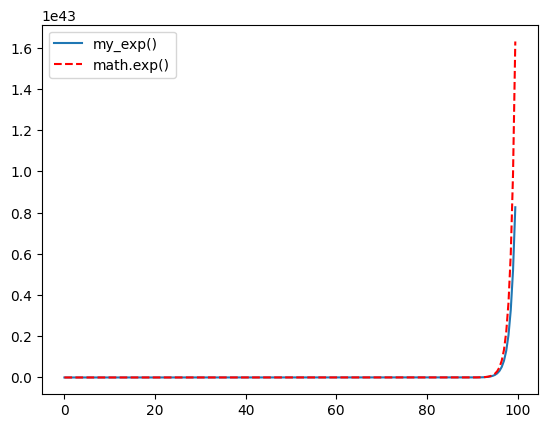

In [1]:
"""
Вычисление экспоненты двумя функциями и вывод полученных значений
"""
import math
import matplotlib.pyplot as plt
import numpy as np

"""Рисование графика"""


def graph(start, end):
    arguments = np.arange(start, end, 0.5)
    plt.plot(  # функция для отображения графика
       arguments,
       [my_exp(a) for a in arguments], label='my_exp()')

    plt.plot(  # функция для отображения графика
       arguments,
       [math.exp(a) for a in arguments], '--r', label='math.exp()')
    plt.legend()
    plt.show()


def my_exp(x_arg):
    """
    Вычисление экспоненты при помощи частичного суммирования
    ряда Тейлора
    """
    exp_res = 0
    for i in range(0, 100):
        exp_res += (x_arg**i)/math.factorial(i)
    return exp_res


help(math.exp)
help(my_exp)

print("Результат, встроенной функции:", math.exp(5))
print("Результат, написанной функции:", my_exp(5))
graph(0, 100)
